# National Data Comparisons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
#Importing the CSVs
nyc_file = "../New York/violent_crime_df_ny.csv"
la_file = "../Los Angeles/LA_Violent_Crime.csv"
tampa_file = "../Tampa/Tampa_violent_crime.csv"
chicago_file = "../Chicago/Chicago_Violent_Crime.csv"
dc_file = "../DC_Crime/DC_Violent_Crime.csv"
US_file = "National Data/FBI_US_Crime_Averages.csv"

nyc_data = pd.read_csv(nyc_file)
la_data = pd.read_csv(la_file)
tampa_data = pd.read_csv(tampa_file)
chicago_data = pd.read_csv(chicago_file)
dc_data = pd.read_csv(dc_file)

US_data = pd.read_csv(US_file)
US_data.columns.values

array(['Year', 'Population1', 'Violent\ncrime2',
       'Violent \ncrime \nrate ',
       'Murder and\nnonnegligent \nmanslaughter',
       'Murder and \nnonnegligent \nmanslaughter \nrate ',
       'Rape\n(revised \ndefinition)3',
       'Rape\n(revised \ndefinition) \nrate3',
       'Rape\n(legacy \ndefinition)4',
       'Rape\n(legacy \ndefinition) \nrate4', 'Robbery',
       'Robbery \nrate ', 'Aggravated \nassault',
       'Aggravated \nassault rate ', 'Property \ncrime',
       'Property \ncrime \nrate ', 'Burglary', 'Burglary \nrate ',
       'Larceny-\ntheft', 'Larceny-\ntheft rate ',
       'Motor \nvehicle \ntheft', 'Motor \nvehicle \ntheft \nrate ',
       'Unnamed: 22', 'Unnamed: 23'], dtype=object)

## Crime Rates

In [3]:
#Clean up FBI US Data
US_data = US_data.rename(columns = {'Violent \ncrime \nrate ': 'value_US', 'Year': 'year'})
US_data = US_data[['year', 'value_US']]

In [4]:
#Merge the dataframes using only the appropriate years
national_data = pd.merge(nyc_data, la_data, on='year', how='outer', suffixes=('_NYC', '_LA'))

national_data = pd.merge(national_data, chicago_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Chi'})

national_data = pd.merge(national_data, tampa_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Tamp'})

dc_data = dc_data.rename(columns={'Year': 'year'})
national_data = pd.merge(national_data, dc_data, on='year', how='outer')
national_data = national_data.rename(columns = {'Violent Crime Rate': 'value_DC'})

national_data = national_data[['year', 'value_NYC', 'value_LA', 'value_Chi', 'value_Tamp', 'value_DC']]

national_data = national_data.rename(columns = {'value_NYC': 'New York City', 'value_LA': 'Los Angeles', 'value_Chi': 'Chicago', 
                                                'value_Tamp': 'Tampa', 'value_DC': 'Washington D.C.'})

national_data = pd.merge(national_data, US_data, on='year', how='left')
national_data = national_data.rename(columns = {'value_US': 'U.S. Average'})

#national_data.plot(kind='line', x='year', figsize=(15,10))
national_data.to_csv('Comparative_Crime_Data.csv')

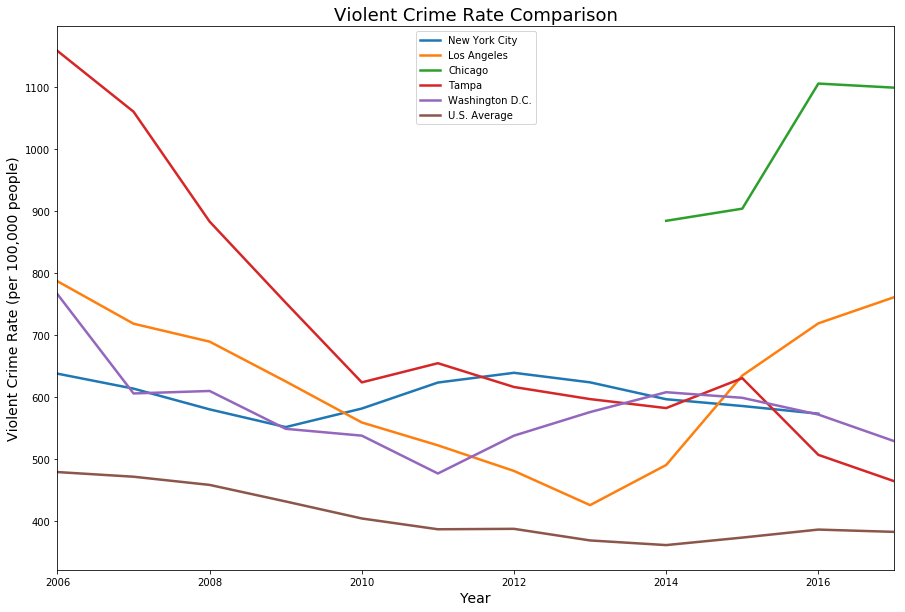

In [5]:
national_data.plot(kind='line', x = 'year', figsize = (15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Violent Crime Rate (per 100,000 people)', size=14)
plt.title('Violent Crime Rate Comparison', size=18)
plt.savefig('Graphs/Violent Crime Rate Comparison (Line)')

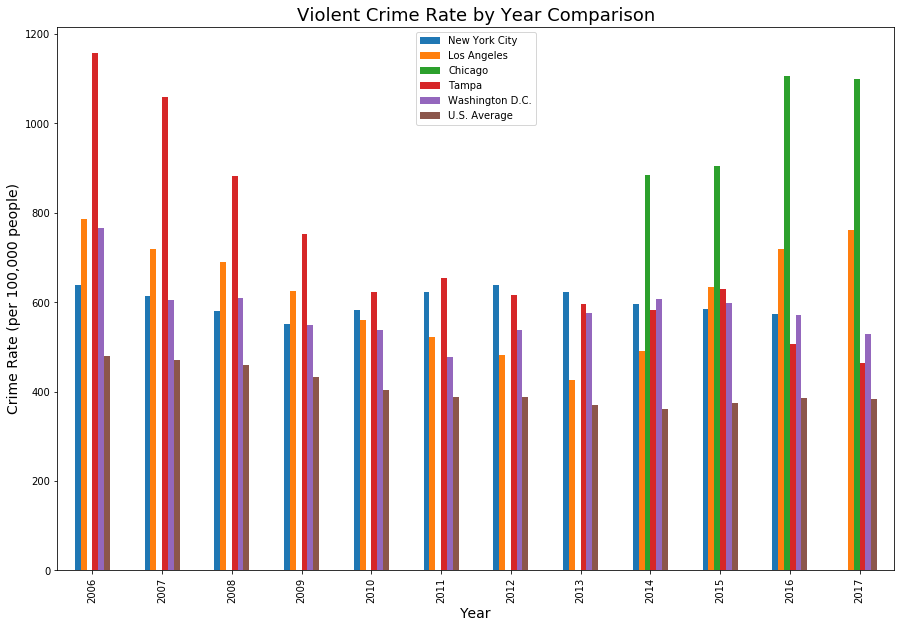

In [6]:
national_data.plot(kind='bar', x='year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Crime Rate (per 100,000 people)', size=14)
plt.title('Violent Crime Rate by Year Comparison', size=18)
plt.savefig('Graphs/Violent Crime Rate Comparison (Bar)')

## Graduation Rates

In [7]:
nyc_grad_file = "../New York/HighSchoolGradRateNewYork.csv"
la_grad_file = "../Los Angeles/LA_education.csv"
chi_grad_file = "../Chicago/Chicago_Graduation_Rates.csv"
tamp_grad_file = "../Tampa/Tampa_education.csv"
dc_grad_file = "../DC_Crime/DC_Grad_Rate.csv"
us_grad_file = "National Data/National_Graduation_Rates.csv"

nyc_grad = pd.read_csv(nyc_grad_file)
la_grad = pd.read_csv(la_grad_file)
chi_grad = pd.read_csv(chi_grad_file)
tamp_grad = pd.read_csv(tamp_grad_file)
dc_grad = pd.read_csv(dc_grad_file)
us_grad = pd.read_csv(us_grad_file)

tamp_grad = tamp_grad[['Year', 'Graduation Rate']]

nyc_grad = nyc_grad.rename(columns = {'Graduation Rate %': 'New York City'})
la_grad = la_grad.rename(columns = {'Graduation Rate': 'Los Angeles'})
chi_grad = chi_grad.rename(columns = {'Graduation Rate': 'Chicago', '\ufeffYears': 'Year'})
tamp_grad = tamp_grad.rename(columns = {'Graduation Rate': 'Tampa'})
dc_grad = dc_grad.rename(columns = {'Graduation_Rate': 'Washington D.C.'})
us_grad = us_grad.rename(columns = {'Graduation Rate': 'U.S. Average'})

In [8]:
national_grad = pd.merge(nyc_grad, la_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, chi_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, tamp_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, dc_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, us_grad, on='Year', how='right')

LA_grad_rate = national_grad['Los Angeles']
NYC_grad_rate = national_grad['New York City']
Chi_grad_rate = national_grad['Chicago']
Tamp_grad_rate = national_grad['Tampa']
DC_grad_rate = national_grad['Washington D.C.']
US_grad_rate = national_grad['U.S. Average']

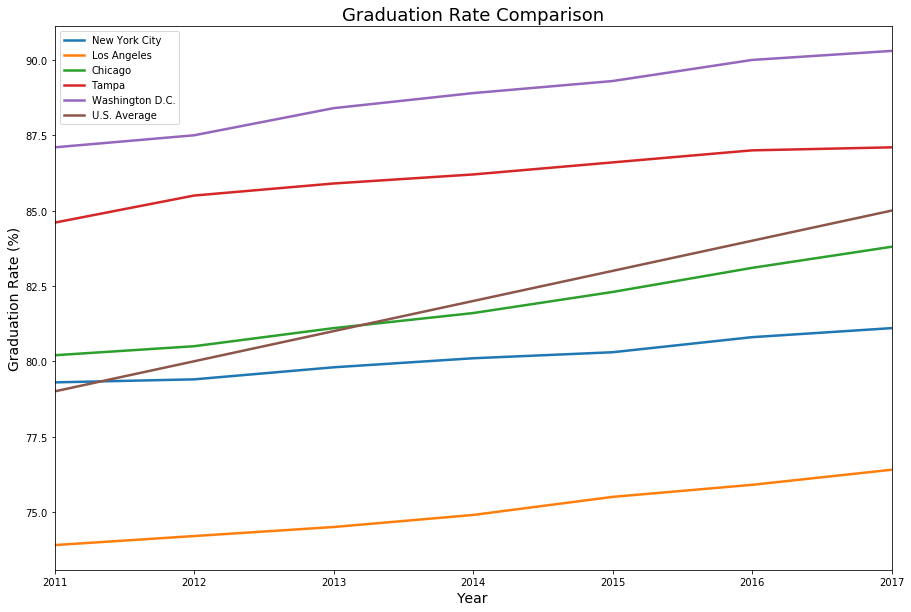

In [9]:
national_grad.plot(kind='line', x='Year', figsize=(15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate Comparison', size=18)
plt.savefig('Graphs/Graduation Rate Comparison (Line)')

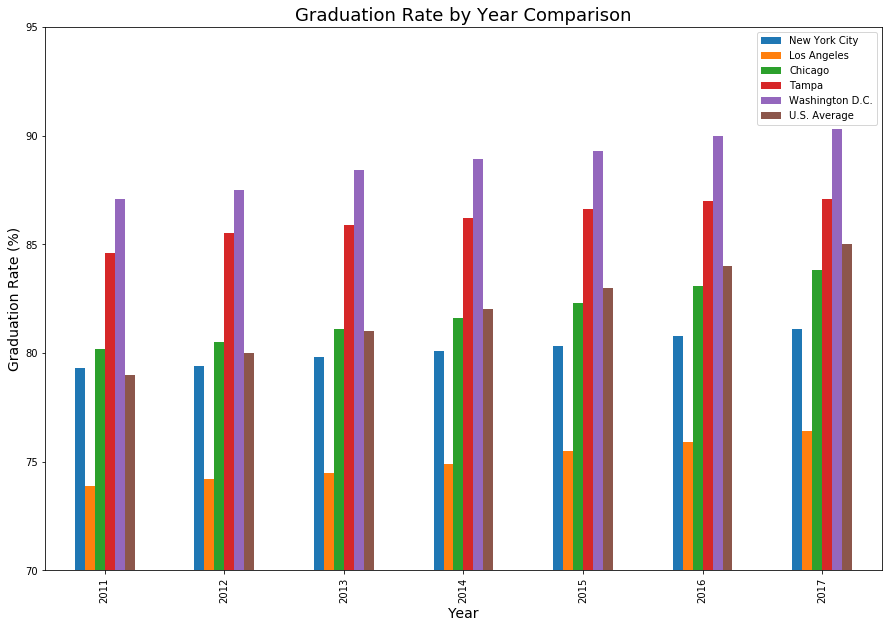

In [10]:
national_grad.plot(kind='bar', x='Year', figsize=(15,10))
plt.ylim(70, 95)
plt.xlabel('Year', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate by Year Comparison', size=18)
plt.savefig('Graphs/Graduation Rate Comparison (Bar)')

In [11]:
stats.f_oneway(LA_grad_rate, NYC_grad_rate, Chi_grad_rate, Tamp_grad_rate, DC_grad_rate, US_grad_rate)

F_onewayResult(statistic=96.2025814440846, pvalue=8.489550849607454e-20)

## Income

### Poverty Rate

In [12]:
nyc_pov_file = "../New York/PercentEarningNewYork.csv"
la_pov_file = "../Los Angeles/LA_income.csv"
chi_pov_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_pov_file = "../Tampa/Tampa_poverty.csv"
dc_pov_file = "../DC_Crime/DC_Perc_Poverty.csv"
us_pov_file = "National Data/National_Poverty_Rates.csv"

nyc_poverty = pd.read_csv(nyc_pov_file)
la_poverty = pd.read_csv(la_pov_file)
chi_poverty = pd.read_csv(chi_pov_file)
tamp_poverty = pd.read_csv(tamp_pov_file)
dc_poverty = pd.read_csv(dc_pov_file)
us_poverty = pd.read_csv(us_pov_file)

us_poverty.columns.values

array(['Year', 'Poverty Rate', 'Median Income'], dtype=object)

In [13]:
#Data Cleanup
#New York
nyc_poverty['New York City'] = nyc_poverty['<$10,000 %'] + nyc_poverty['$10,000 - $14,999 %'] + nyc_poverty['$15,000 - $24,999 %']
nyc_poverty = nyc_poverty[['Year', 'New York City']]

#Los Angeles
la_poverty['Los Angeles'] = la_poverty['% 15000-24999'] + la_poverty['% 10000-14999'] + la_poverty['% <10000']
la_poverty = la_poverty[['Year', 'Los Angeles']]

#Chicago
chi_poverty['Chicago'] = chi_poverty['< $10,000'] + chi_poverty['$10,000 - $14,999'] + chi_poverty['$15,000 - $24,999']
chi_poverty = chi_poverty.rename(columns={'\ufeffYears': 'Year'})
chi_poverty = chi_poverty[['Year', 'Chicago']]

#Tampa
tamp_poverty = tamp_poverty.rename(columns = {'% <25000': 'Tampa'})
tamp_poverty = tamp_poverty[['Year', 'Tampa']]

#Washington D.C.
dc_poverty = dc_poverty.rename(columns = {'Percent Below Poverty Line': 'Washington D.C.'})
dc_poverty = dc_poverty[['Year', 'Washington D.C.']]

#United States
us_poverty = us_poverty.rename(columns = {'Poverty Rate': 'U.S. Average'})
us_poverty = us_poverty[['Year', 'U.S. Average']]

In [14]:
national_poverty = pd.merge(nyc_poverty, la_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, chi_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, tamp_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, dc_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, us_poverty, on='Year', how='left')

LA_pov_rate = national_poverty['Los Angeles']
NYC_pov_rate = national_poverty['New York City']
Chi_pov_rate = national_poverty['Chicago']
Tamp_pov_rate = national_poverty['Tampa']
DC_pov_rate = national_poverty['Washington D.C.']
US_pov_rate = national_poverty['U.S. Average']

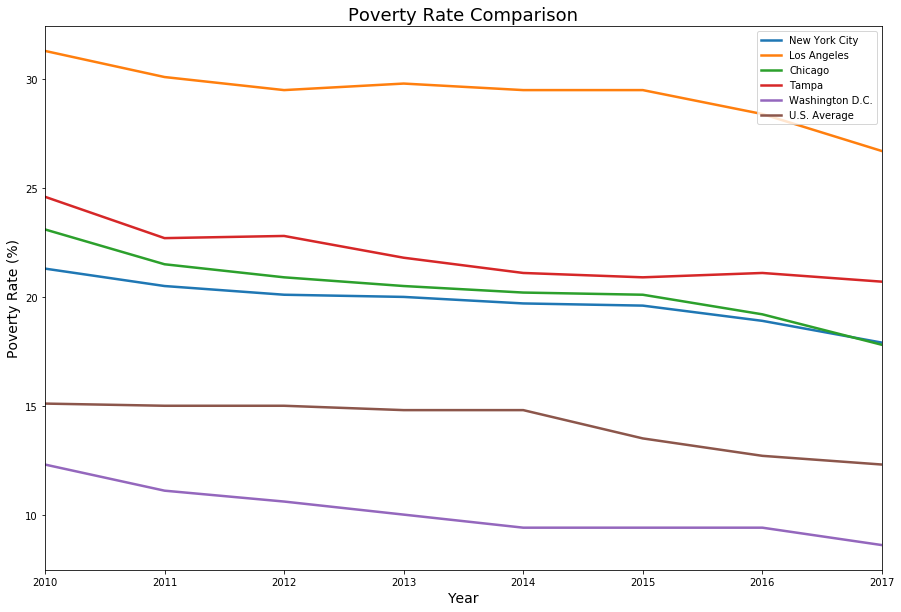

In [15]:
national_poverty.plot(kind='line', x='Year', figsize=(15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Poverty Rate (%)', size=14)
plt.title('Poverty Rate Comparison', size=18)
plt.savefig('Graphs/Poverty Rate Comparison (Line)')

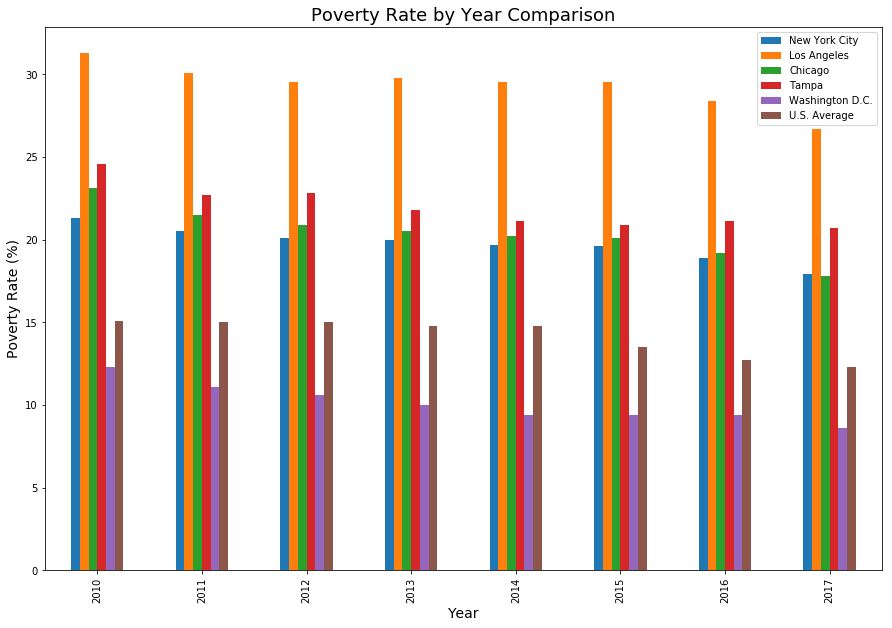

In [16]:
national_poverty.plot(kind='bar', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Poverty Rate (%)', size=14)
plt.title('Poverty Rate by Year Comparison', size=18)
plt.savefig('Graphs/Poverty Rate Comparison (Bar)')

In [17]:
stats.f_oneway(LA_pov_rate, NYC_pov_rate, Chi_pov_rate, Tamp_pov_rate, DC_pov_rate, US_pov_rate)

F_onewayResult(statistic=216.92438658719402, pvalue=7.49168490647361e-29)

### Median Income

In [18]:
nyc_inc_file = "../New York/PercentEarningNewYork.csv"
la_inc_file = "../Los Angeles/LA_income.csv"
chi_inc_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_inc_file = "../Tampa/Tampa_income.csv"
dc_inc_file = "../DC_Crime/DC_Med_Income.csv"
us_inc_file = "National Data/National_Poverty_Rates.csv"

nyc_income = pd.read_csv(nyc_inc_file)
la_income = pd.read_csv(la_inc_file)
chi_income = pd.read_csv(chi_inc_file)
tamp_income = pd.read_csv(tamp_inc_file)
dc_income = pd.read_csv(dc_inc_file)
us_income = pd.read_csv(us_inc_file)

us_income

,Year,Poverty Rate,Median Income
0,2017,12.3,NaN
1,2016,12.7,31099.0
2,2015,13.5,30622.0
3,2014,14.8,29154.0
4,2013,14.8,28518.0
5,2012,15.0,28213.0
6,2011,15.0,28366.0
7,2010,15.1,28815.0
8,2009,14.3,29235.0
9,2008,13.2,29556.0


In [19]:
nyc_income = nyc_income.rename(columns ={'Median Earnings $': 'New York City'})
nyc_income = nyc_income[['Year', 'New York City']]

la_income = la_income.rename(columns={'Median Income': 'Los Angeles'})
la_income = la_income[['Year', 'Los Angeles']]

chi_income = chi_income.rename(columns = {'\ufeffYears': 'Year', 'med': 'Chicago'})
chi_income = chi_income[['Year', 'Chicago']]

tamp_income = tamp_income.rename(columns = {'Median Income': 'Tampa'})
tamp_income = tamp_income[['Year', 'Tampa']]

dc_income = dc_income.rename(columns ={'Median Earnings': 'Washington D.C.'})

us_income = us_income.rename(columns ={'Median Income': 'U.S. Average'})
us_income = us_income[['Year', 'U.S. Average']]

In [20]:
national_income = pd.merge(nyc_income, la_income, on='Year', how='outer')
national_income = pd.merge(national_income, chi_income, on='Year', how='outer')
national_income = pd.merge(national_income, tamp_income, on='Year', how='outer')
national_income = pd.merge(national_income, dc_income, on='Year', how='outer')
national_income = pd.merge(national_income, us_income, on='Year', how='left')

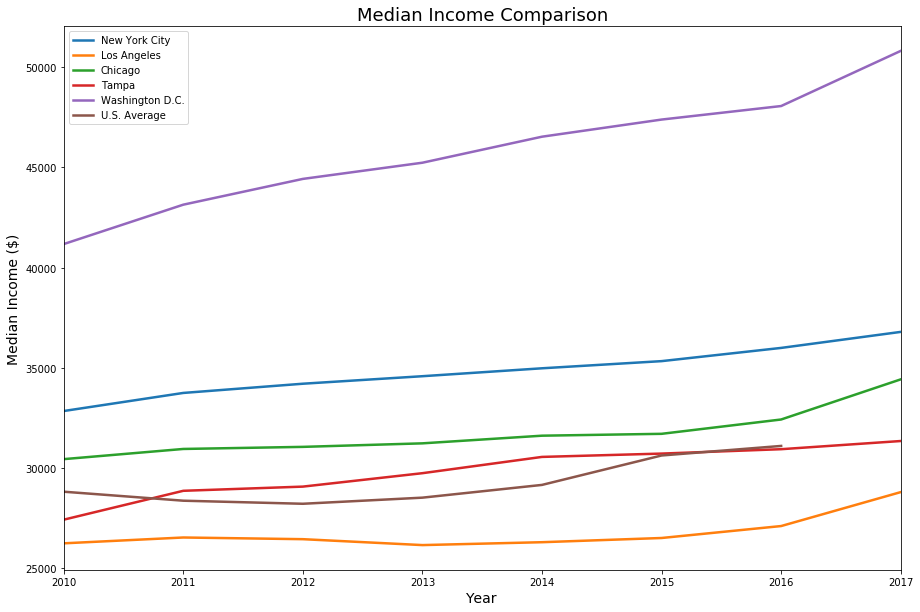

In [21]:
national_income.plot(kind='line', x='Year', figsize=(15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Median Income ($)', size=14)
plt.title('Median Income Comparison', size=18)
plt.savefig('Graphs/Median Income Comparison (Line)')

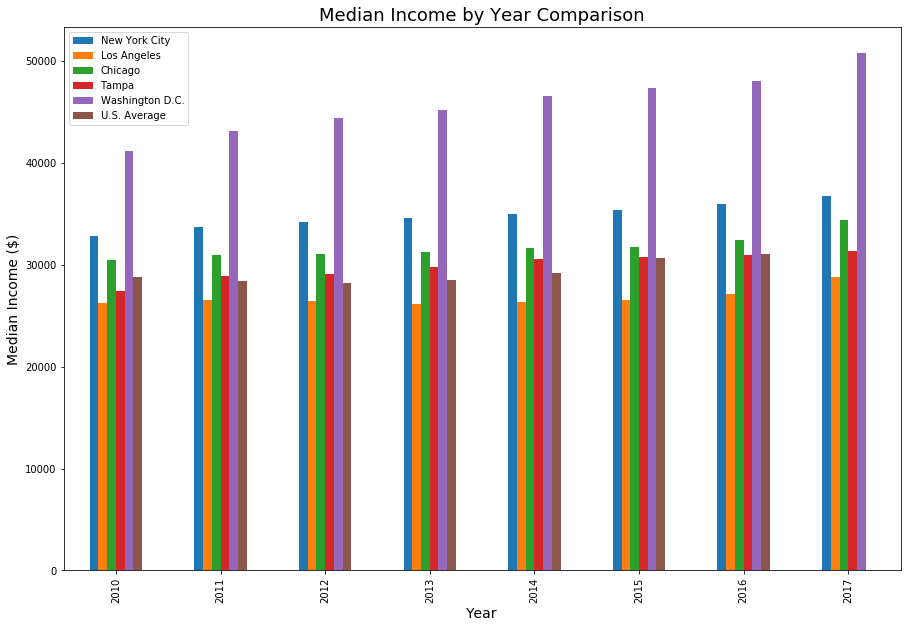

In [22]:
national_income.plot(kind='bar', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Median Income ($)', size=14)
plt.title('Median Income by Year Comparison', size=18)
plt.savefig('Graphs/Median Income Comparison (Bar)')

## Statistics

In [23]:
national_income = national_income.drop(index=7)
LA_med_income = national_income['Los Angeles']
NYC_med_income = national_income['New York City']
Chi_med_income = national_income['Chicago']
Tamp_med_income = national_income['Tampa']
DC_med_income = national_income['Washington D.C.']
US_med_income = national_income['U.S. Average']

In [24]:
print(f"ANOVA: {stats.f_oneway(LA_med_income, NYC_med_income, Chi_med_income, Tamp_med_income, DC_med_income, US_med_income)}\n")
print(f"Los Angeles Line Regression: {linregress(national_income['Year'], LA_med_income)}\n")
print(f"New York City Line Regression: {linregress(national_income['Year'], NYC_med_income)}\n")
print(f"Chicago Line Regression: {linregress(national_income['Year'], Chi_med_income)}\n")
print(f"Tampa Line Regression: {linregress(national_income['Year'], Tamp_med_income)}\n")
print(f"Washington D.C. Line Regression: {linregress(national_income['Year'], DC_med_income)}\n")
print(f"United States Line Regression: {linregress(national_income['Year'], US_med_income)}\n")

ANOVA: F_onewayResult(statistic=176.64581442935526, pvalue=2.8190768332255552e-24)

Los Angeles Line Regression: LinregressResult(slope=85.17857142857143, intercept=-144997.75, rvalue=0.587172461654831, pvalue=0.16572740727986682, stderr=52.51411617802572)

New York City Line Regression: LinregressResult(slope=478.25, intercept=-928194.6785714285, rvalue=0.988902795097734, pvalue=2.476857956134968e-05, stderr=32.13142256929397)

Chicago Line Regression: LinregressResult(slope=285.7857142857143, intercept=-543943.9285714285, rvalue=0.9709285080436958, pvalue=0.00027247374960531713, stderr=31.509198527362344)

Tampa Line Regression: LinregressResult(slope=562.3928571428571, intercept=-1102483.8214285714, rvalue=0.9634112501557277, pvalue=0.00048223256949809606, stderr=69.97171257890216)

Washington D.C. Line Regression: LinregressResult(slope=1116.5714285714284, intercept=-2202524.857142857, rvalue=0.9878503294357257, pvalue=3.104791959161742e-05, stderr=78.5569207385219)

United States 

## Comparisons

In [25]:
national_data_new = national_data.drop(index=[0,1,2,3,4])

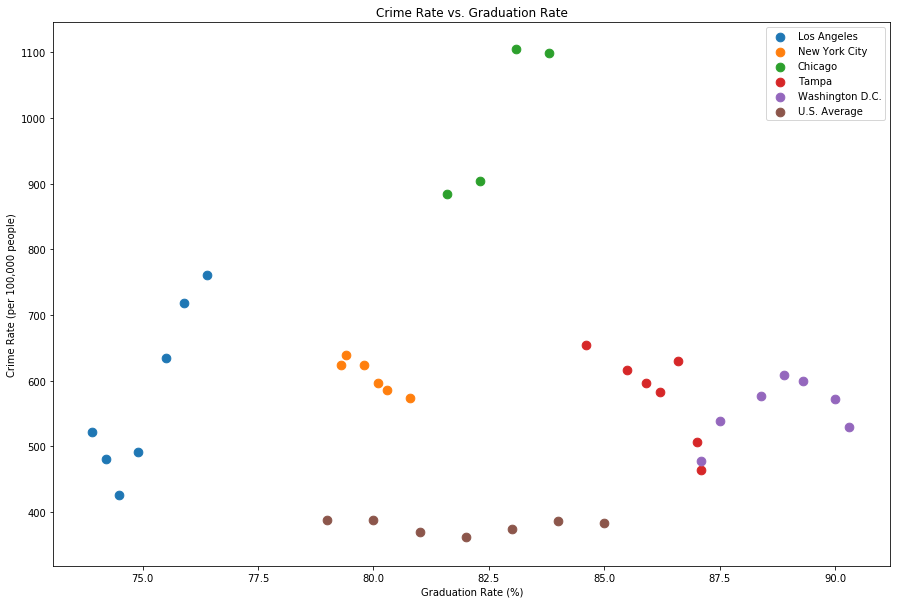

In [26]:
plt.figure(figsize=(15,10))
plt.scatter(national_grad['Los Angeles'], national_data_new['Los Angeles'], s=75)
plt.scatter(national_grad['New York City'], national_data_new['New York City'], s=75)
plt.scatter(national_grad['Chicago'], national_data_new['Chicago'], s=75)
plt.scatter(national_grad['Tampa'], national_data_new['Tampa'], s=75)
plt.scatter(national_grad['Washington D.C.'], national_data_new['Washington D.C.'], s=75)
plt.scatter(national_grad['U.S. Average'], national_data_new['U.S. Average'], s=75)
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Crime Rate (per 100,000 people)')
plt.title('Crime Rate vs. Graduation Rate')
plt.legend(loc='best')
plt.savefig('Graphs/Crime Rate vs. Graduation Rate (Scatter).png')

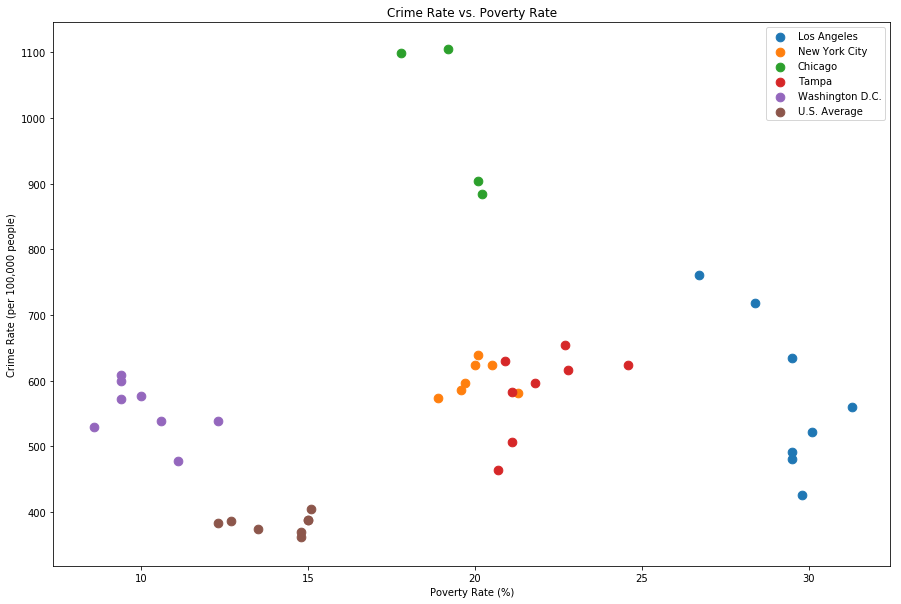

In [27]:
national_data_new2 = national_data.drop(index=[0,1,2,3])
plt.figure(figsize=(15,10))
plt.scatter(national_poverty['Los Angeles'], national_data_new2['Los Angeles'], s=75)
plt.scatter(national_poverty['New York City'], national_data_new2['New York City'], s=75)
plt.scatter(national_poverty['Chicago'], national_data_new2['Chicago'], s=75)
plt.scatter(national_poverty['Tampa'], national_data_new2['Tampa'], s=75)
plt.scatter(national_poverty['Washington D.C.'], national_data_new2['Washington D.C.'], s=75)
plt.scatter(national_poverty['U.S. Average'], national_data_new2['U.S. Average'], s=75)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Crime Rate (per 100,000 people)')
plt.title('Crime Rate vs. Poverty Rate')
plt.legend(loc='best')
plt.savefig('Graphs/Crime Rate vs. Poverty Rate (Scatter).png')

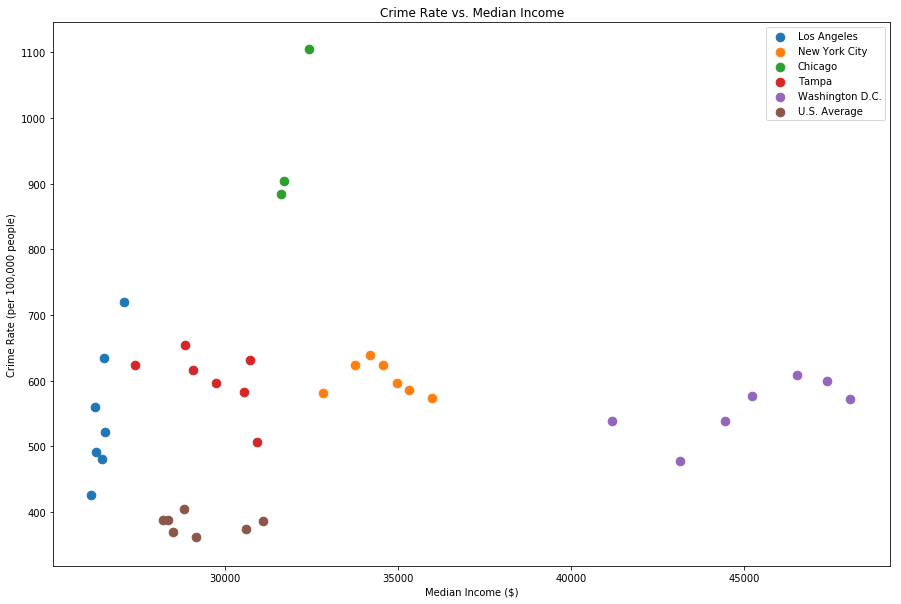

In [28]:
national_data_new3 = national_data_new2.drop(index=11)
plt.figure(figsize=(15,10))
plt.scatter(national_income['Los Angeles'], national_data_new3['Los Angeles'], s=75)
plt.scatter(national_income['New York City'], national_data_new3['New York City'], s=75)
plt.scatter(national_income['Chicago'], national_data_new3['Chicago'], s=75)
plt.scatter(national_income['Tampa'], national_data_new3['Tampa'], s=75)
plt.scatter(national_income['Washington D.C.'], national_data_new3['Washington D.C.'], s=75)
plt.scatter(national_income['U.S. Average'], national_data_new3['U.S. Average'], s=75)
plt.xlabel('Median Income ($)')
plt.ylabel('Crime Rate (per 100,000 people)')
plt.title('Crime Rate vs. Median Income')
plt.legend(loc='best')
plt.savefig('Graphs/Crime Rate vs. Median Income (Scatter).png')